In [3]:
import pandas as pd
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
from glob import glob


import librosa
import librosa.display

In [5]:


africa_list = glob("./data/train/africa/*.wav")#glob 함수는 입력하는 폴더 아래 파일들의 path를 가져온다.
canada_list = glob("./data/train/canada/*.wav")#glob 함수는 입력하는 폴더 아래 파일들의 path를 가져온다.
england_list = glob("./data/train/england/*.wav")#glob 함수는 입력하는 폴더 아래 파일들의 path를 가져온다.
australia_list = glob("./data/train/australia/*.wav")#glob 함수는 입력하는 폴더 아래 파일들의 path를 가져온다.
hongkong_list = glob("./data/train/hongkong/*.wav")#glob 함수는 입력하는 폴더 아래 파일들의 path를 가져온다.
us_list = glob("./data/train/us/*.wav")#glob 함수는 입력하는 폴더 아래 파일들의 path를 가져온다.

In [7]:
librosa.load(africa_list[0])

(array([ 0.000000e+00,  0.000000e+00,  0.000000e+00, ..., -6.645403e-07,
         2.490921e-07,  0.000000e+00], dtype=float32),
 22050)

In [8]:
#각 나라별 파일 한개씩 가져와서 읽기
africa,_=librosa.load(africa_list[0])
canada,_=librosa.load(canada_list[0])
england,_=librosa.load(england_list[0])
australia,_=librosa.load(australia_list[0])
hongkong,_=librosa.load(hongkong_list[0])
us,_=librosa.load(us_list[0])





In [9]:
africa

array([ 0.000000e+00,  0.000000e+00,  0.000000e+00, ..., -6.645403e-07,
        2.490921e-07,  0.000000e+00], dtype=float32)

# waveform

In [10]:
FIG_SIZE=(10,8)
sr=22050

Text(0.5, 1.0, 'Waveform')

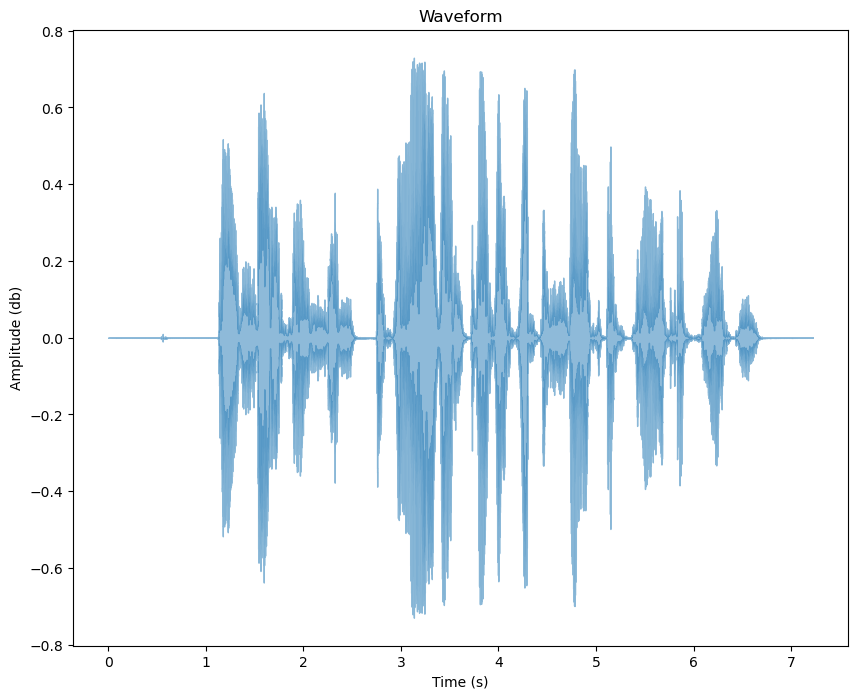

In [11]:
plt.figure(figsize=FIG_SIZE)
librosa.display.waveshow(africa, sr=sr, alpha=0.5)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude (db)")
plt.title("Waveform")


# SPECTRUM

Text(0, 0.5, 'Magnitude')

<Figure size 1000x800 with 0 Axes>

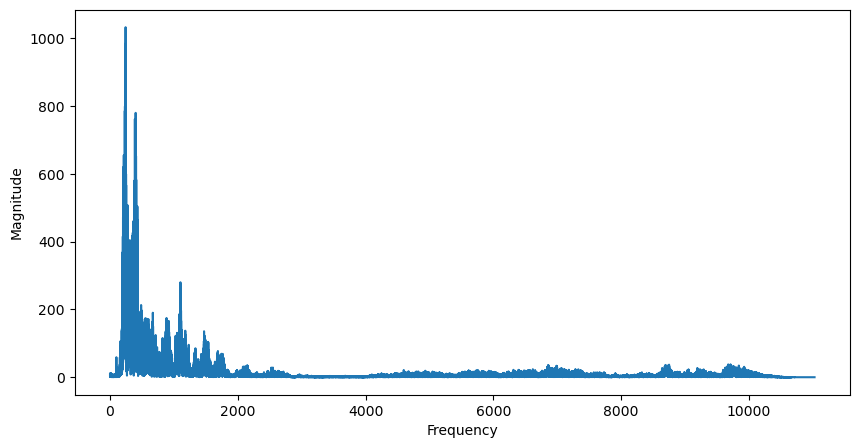

In [12]:
plt.figure(figsize=FIG_SIZE)
fft = np.fft.fft(africa)

magnitude = np.abs(fft) 
frequency = np.linspace(0,sr,len(magnitude))

left_spectrum = magnitude[:int(len(magnitude) / 2)]
left_frequency = frequency[:int(len(frequency) / 2)]

plt.figure(figsize = (10,5))
plt.plot(left_frequency, left_spectrum)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")

# STFT

https://sanghyu.tistory.com/38?category=1120070


In [13]:
win_length =  np.int64(sr/40) # 
n_fft= win_length # WINDOWS SIZE중 사용할 길이. WINDOW SIZE가 넘어가면 나머지 것들은 zero padding
hop_length= np.int64( np.ceil(win_length/4) ) #  얼마만큼 시간 주기를 이동하면서 분석을 할 것인지. 일반적으로 window size의 1/4
#또는 10ms만큼으로 한다고 한다. (stride)
#hop: 윈도우가 겹치는 사이즈

stfts=librosa.stft(africa,win_length=win_length,n_fft=n_fft, hop_length=hop_length)
spectrogram = np.abs(stfts)
print(len(stfts[0]))

1155


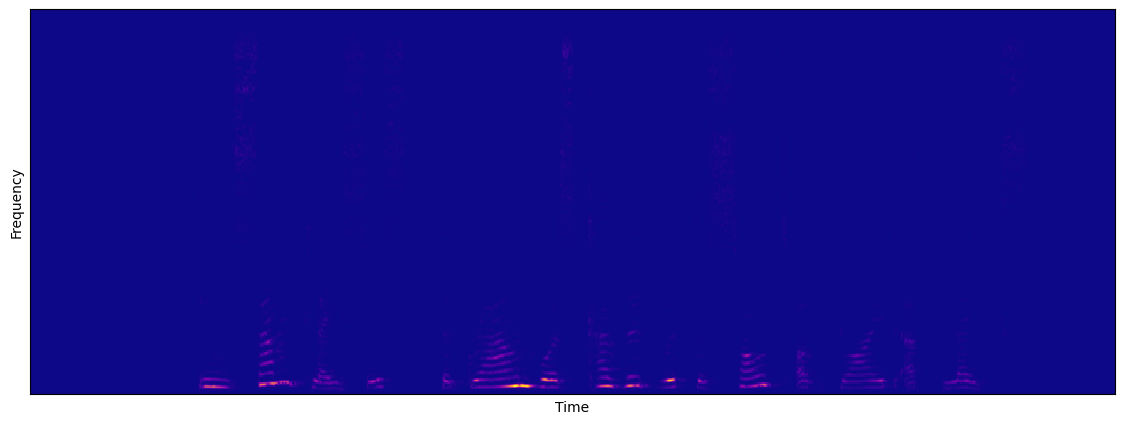

In [14]:
fig = plt.figure(figsize = (14,5))
librosa.display.specshow(spectrogram, sr=sr, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.plasma()
plt.show()

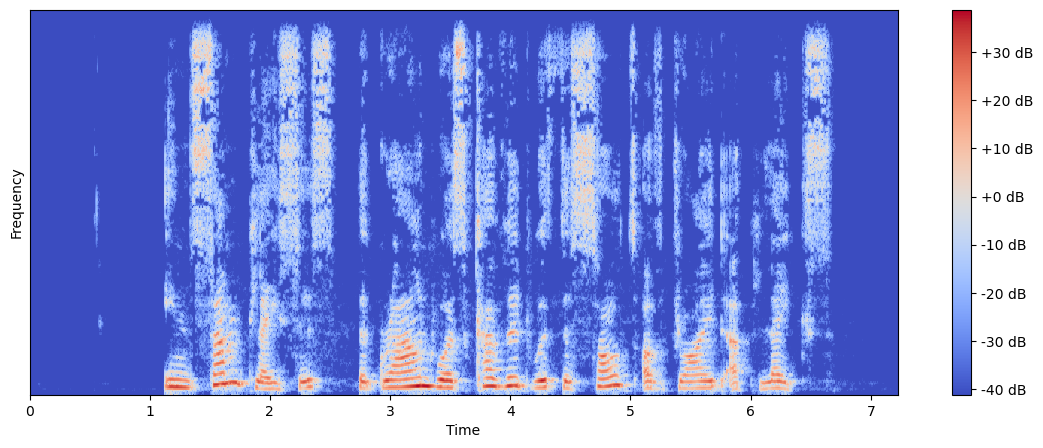

In [16]:
fig = plt.figure(figsize = (14,5))

log_spectrogram=librosa.amplitude_to_db(spectrogram)
librosa.display.specshow(log_spectrogram, sr=sr, hop_length=hop_length,x_axis='time')
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(format='%+2.0f dB')
plt.show()

#대부분 1024hz 아래에 모여있음을 관측

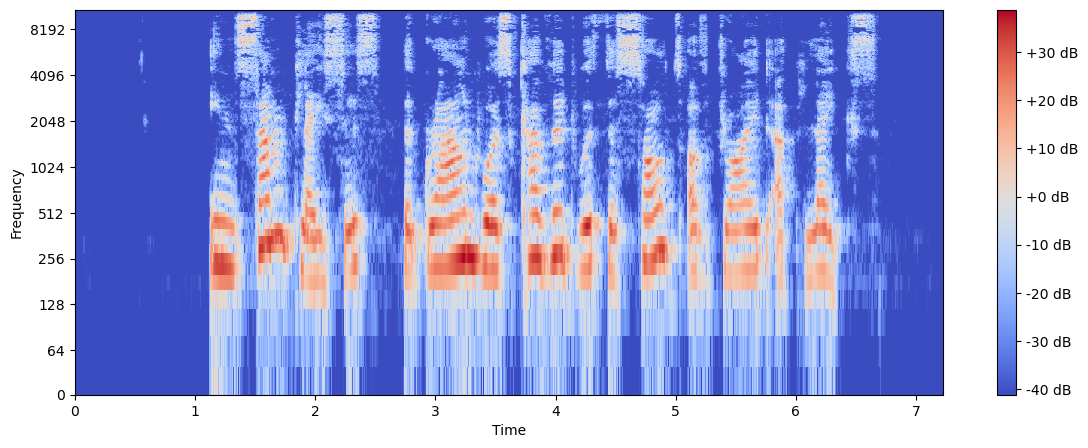

In [37]:
fig = plt.figure(figsize = (14,5))

log_spectrogram=librosa.amplitude_to_db(spectrogram)
librosa.display.specshow(log_spectrogram, sr=sr, hop_length=hop_length,x_axis='time',y_axis='log') # y축 frequency 단위에 log 취해서 plot
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(format='%+2.0f dB')
plt.show()

#대부분 1024hz 아래에 모여있음을 관측

# mel spectrogram

(128, 1155)


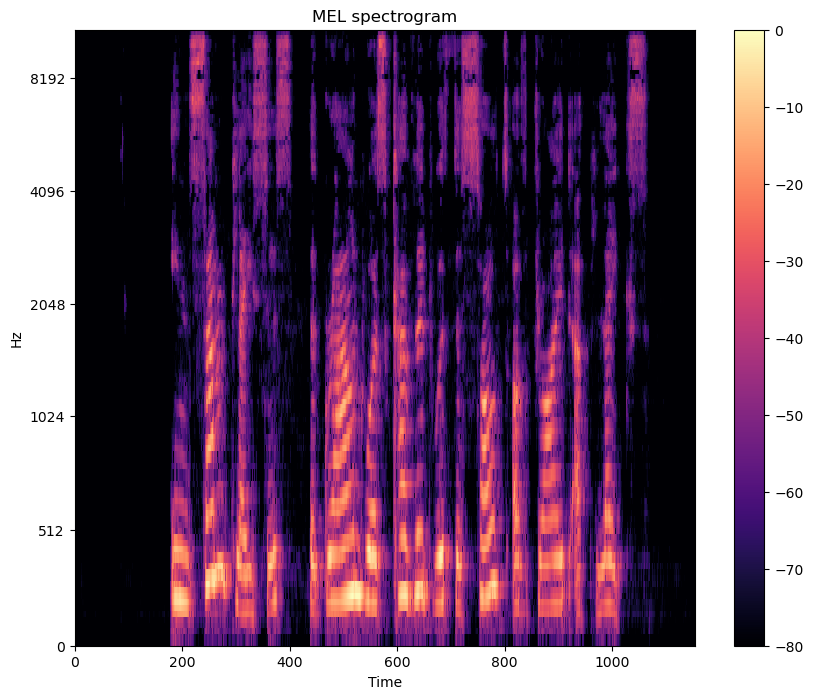

In [17]:
mel = librosa.feature.melspectrogram(y=africa, sr=sr,win_length=win_length ,n_fft=n_fft, hop_length=hop_length)
mel = librosa.core.power_to_db(mel,ref=np.max)
plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(mel, sr=sr, hop_length=hop_length, x_axis='frames', y_axis='mel')
plt.xlabel("Time")

plt.ylabel("Hz")
plt.colorbar()
plt.title("MEL spectrogram")

print(mel.shape)

# MFCC

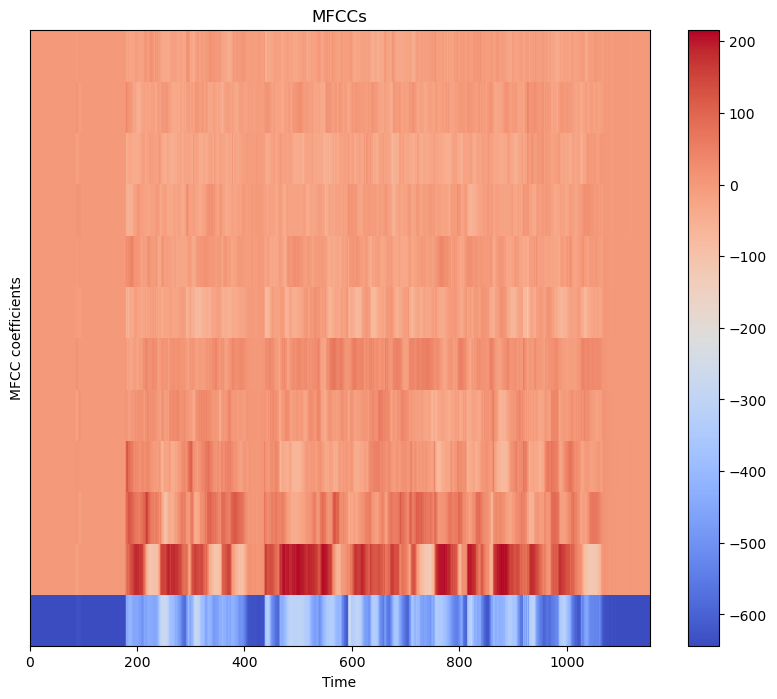

(13, 1155)


In [18]:
MFCCs = librosa.feature.mfcc(y=africa, sr=sr,win_length=win_length ,n_fft=n_fft, hop_length=hop_length, n_mfcc=13)

# display MFCCs
plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(MFCCs, sr=sr, hop_length=hop_length,x_axis='frames')
plt.xlabel("Time")

plt.ylabel("MFCC coefficients")
plt.colorbar()
plt.title("MFCCs")

# show plots
plt.show()
print(MFCCs.shape)

# 나라별 비교

(128, 1155)
(128, 1024)
(128, 1116)
(128, 1807)
(128, 879)
(128, 1059)


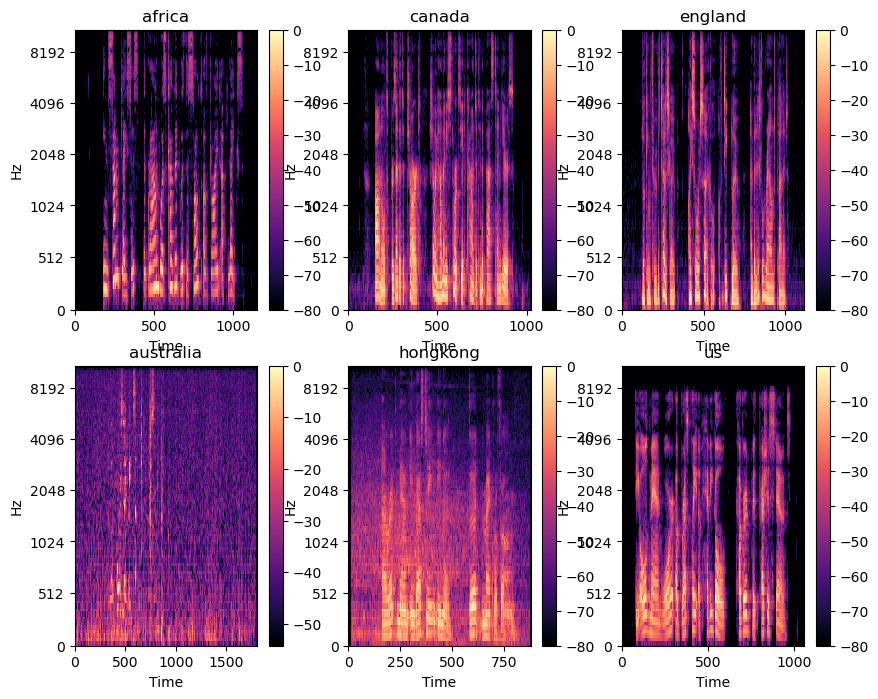

In [54]:
audios=[africa,canada,england,australia,hongkong,us]
audio_names = ["africa","canada","england","australia","hongkong","us"]

plt.figure(figsize=FIG_SIZE)
for index,audio in enumerate(audios):

    plt.subplot(2,3,index+1)


    mel = librosa.feature.melspectrogram(y=audio, sr=sr,win_length=win_length ,n_fft=n_fft, hop_length=hop_length)
    mel = librosa.core.power_to_db(mel,ref=np.max)
    librosa.display.specshow(mel, sr=sr, hop_length=hop_length, x_axis='frames', y_axis='mel')
    plt.xlabel("Time")

    plt.ylabel("Hz")
    plt.colorbar()
    plt.title(audio_names[index])

    print(mel.shape)




